In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_hdf('/home/sunnyu/yuchuan/data/train2.h5')
# test = pd.read_hdf('/home/sunnyu/yuchuan/data/test.h5')

In [3]:
train.groupby(['ship'])['type'].first().reset_index().groupby('type').count()

,ship
type,
刺网,1333
围网,3541
拖网,3292


In [4]:
train['pdtime'] = pd.to_datetime(train['time'], format='%m%d %H:%M:%S')

In [5]:
def show_pic(type_pic,type_name):
    ids = train[train['type']==type_name]['ship'].unique()
    ids = [ids[np.random.randint(len(ids))] for x in range(10)]
    t = train[train['ship'].isin(ids)]

    f, ax = plt.subplots(5,2, figsize=(15,40))
    for index, cur_id in enumerate(ids):
        cur = t[t['ship']==cur_id]
        i = index//2
        j = index % 2
        curh=cur['pdtime'].apply(lambda x:x.hour)
        curb=cur[(curh<6) | (curh>=18)]
        curr=cur[(curh>=6) & (curh<18)]
        if (type_pic=='v'):
            ax[i,j].plot(curb['v'],c='blue',alpha=0.5)
            ax[i,j].plot(curr['v'],c='red',alpha=0.5)
        elif (type_pic=='xy'):
            ax[i,j].plot(curb['x'], curb['y'],c='blue',alpha=0.5)
            ax[i,j].plot(curr['x'], curr['y'],c='red',alpha=0.5)
        elif (type_pic=='d'):
            ax[i,j].plot(cur['d'])
#         if i==0 and j==0:
        ax[i,j].set_title(cur_id)

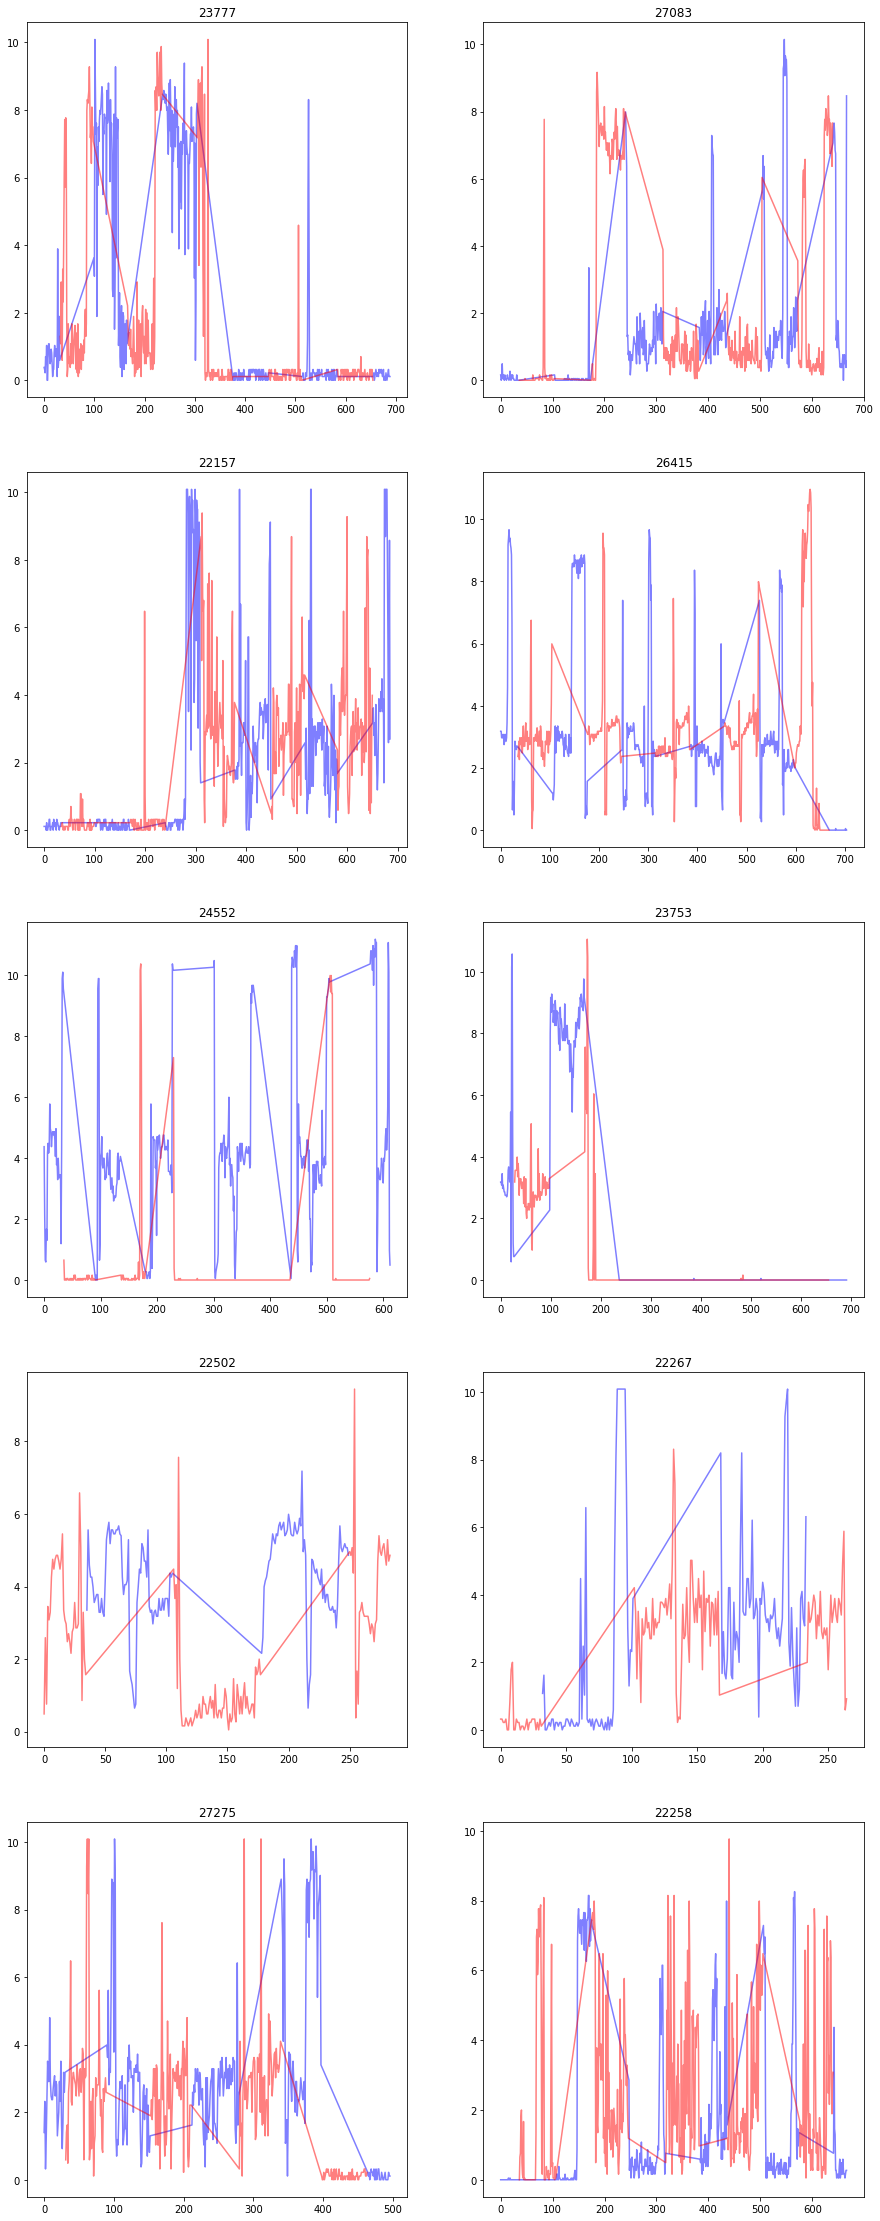

In [6]:
show_pic('v','围网')

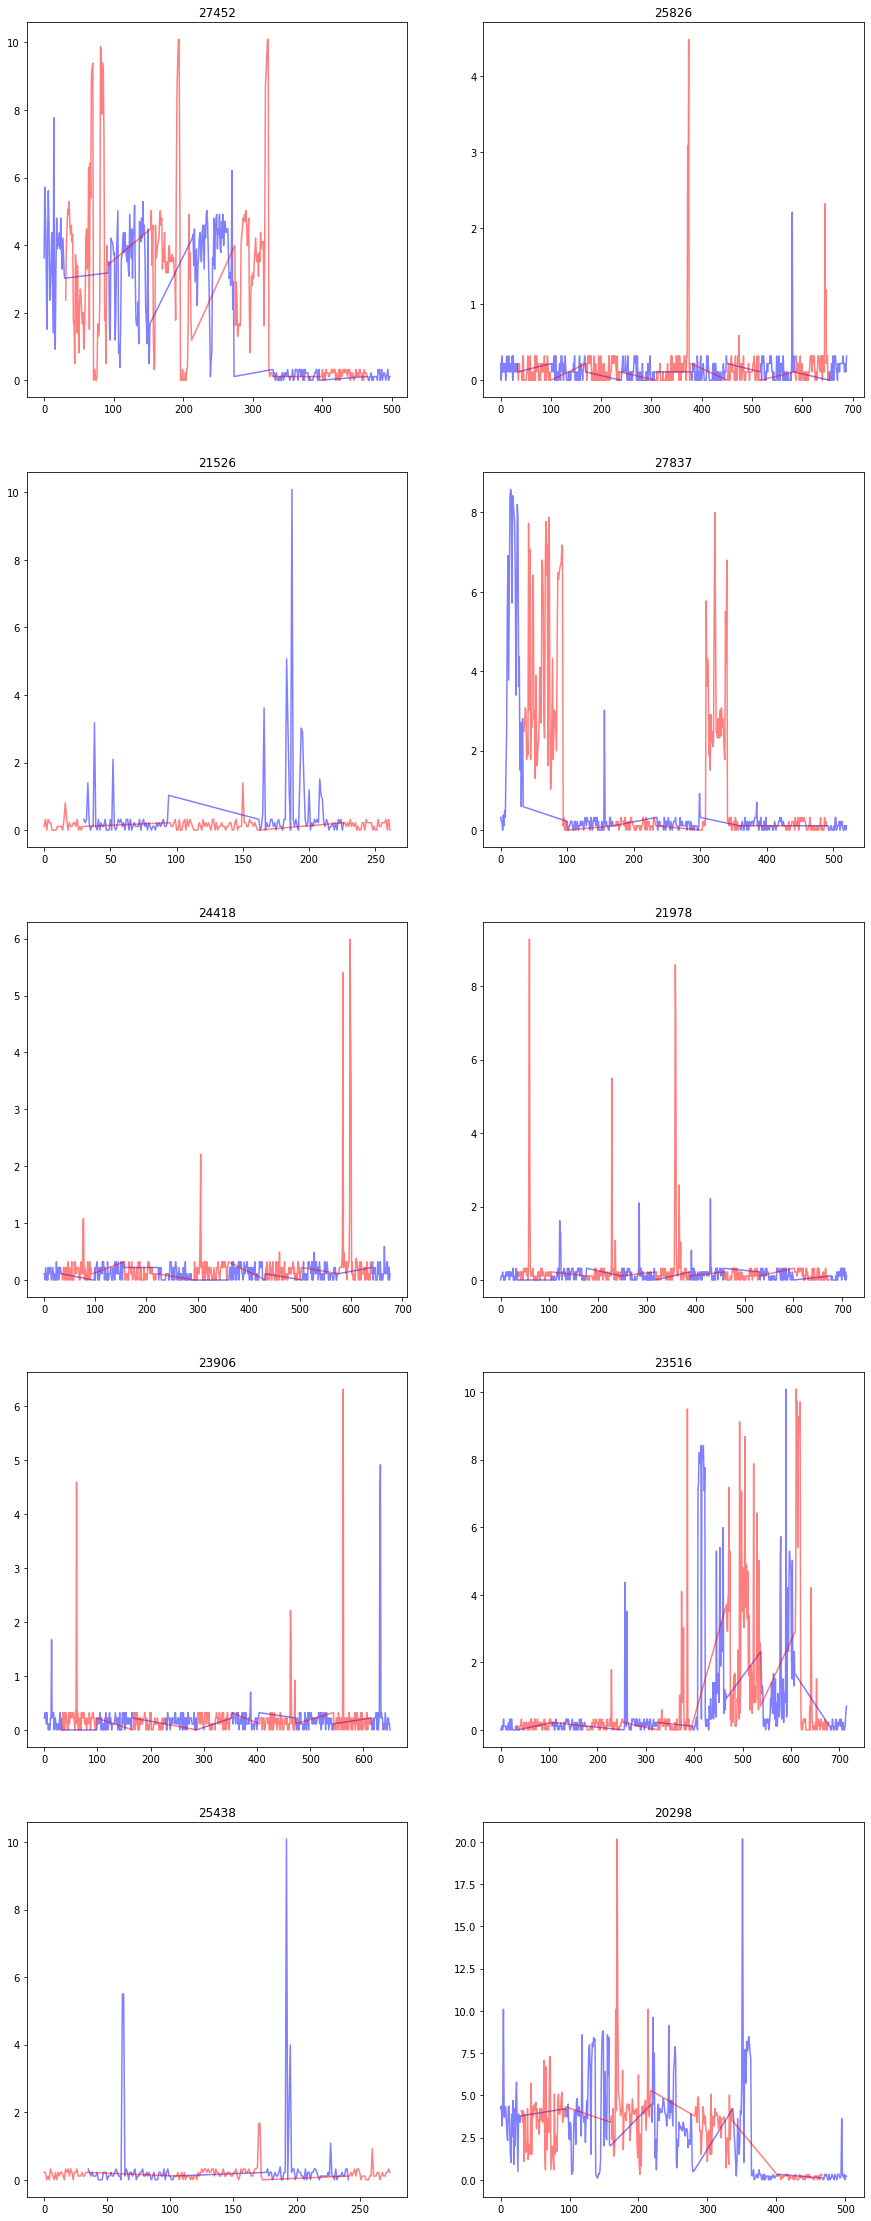

In [8]:
show_pic('v','刺网')

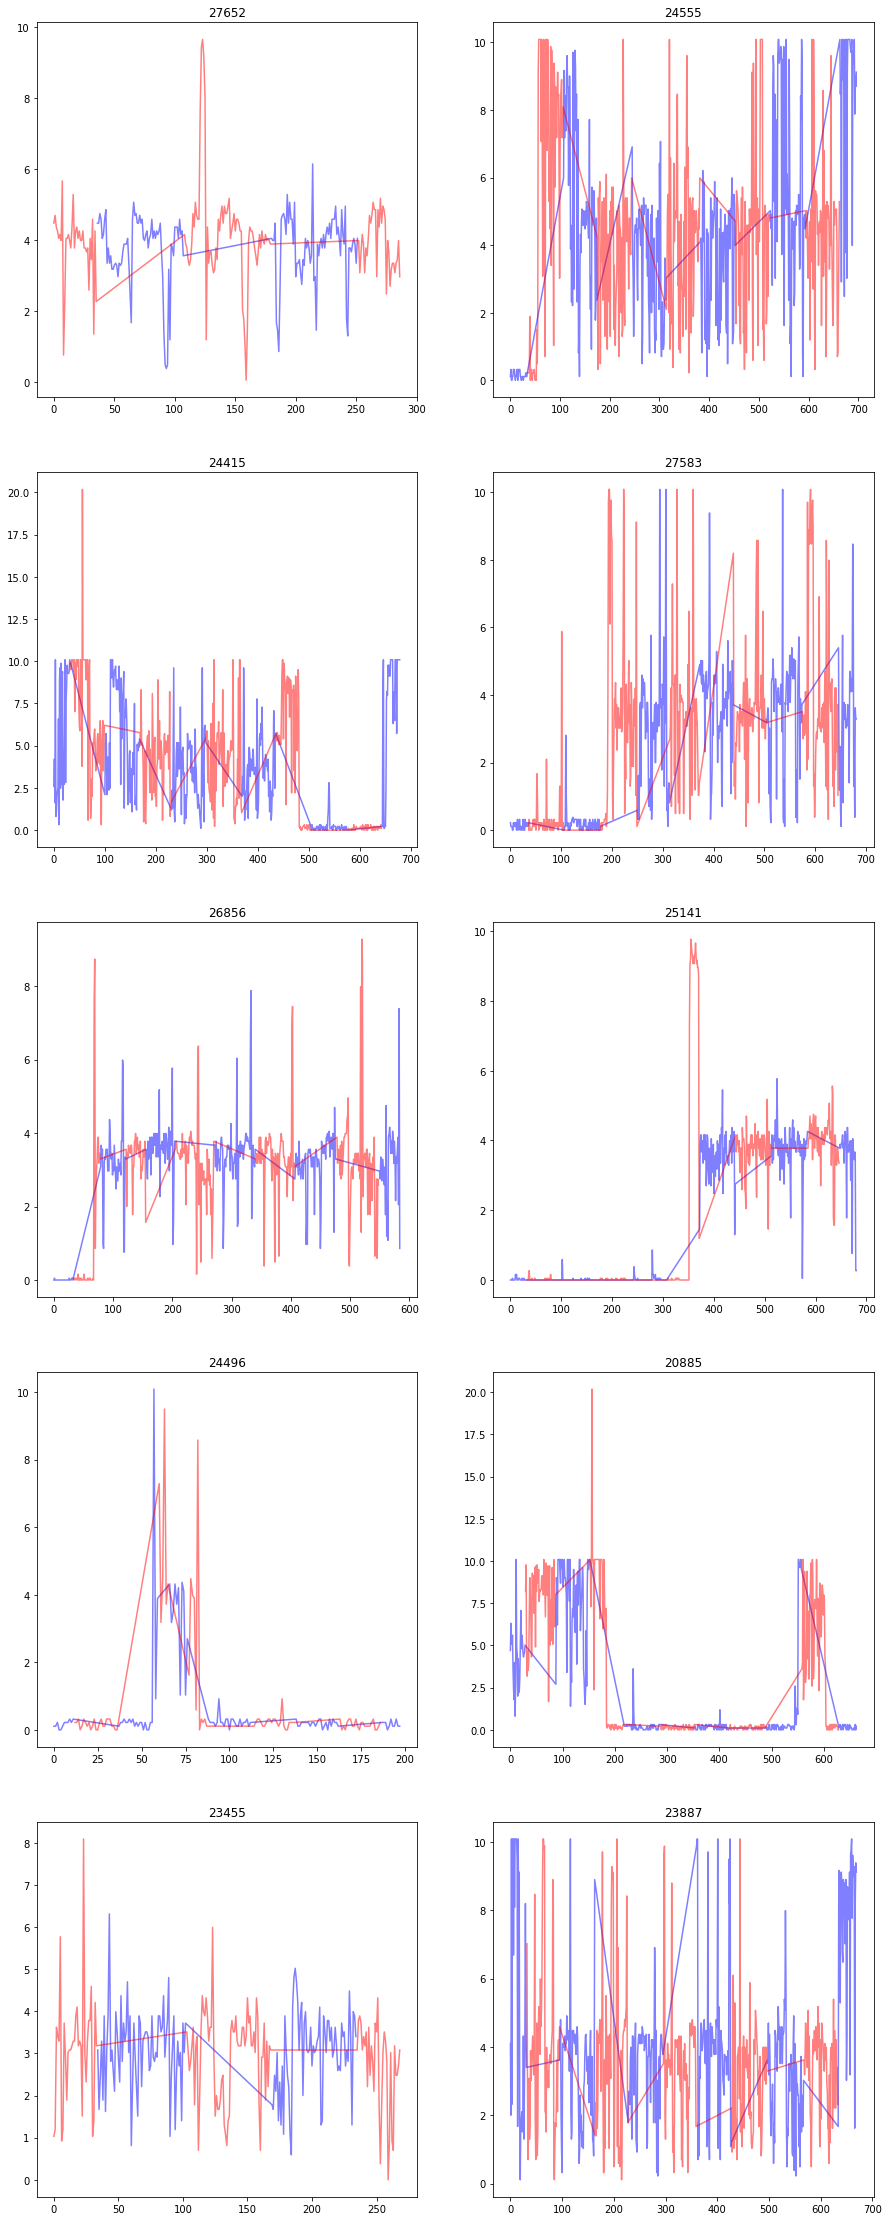

In [7]:
show_pic('v','拖网')

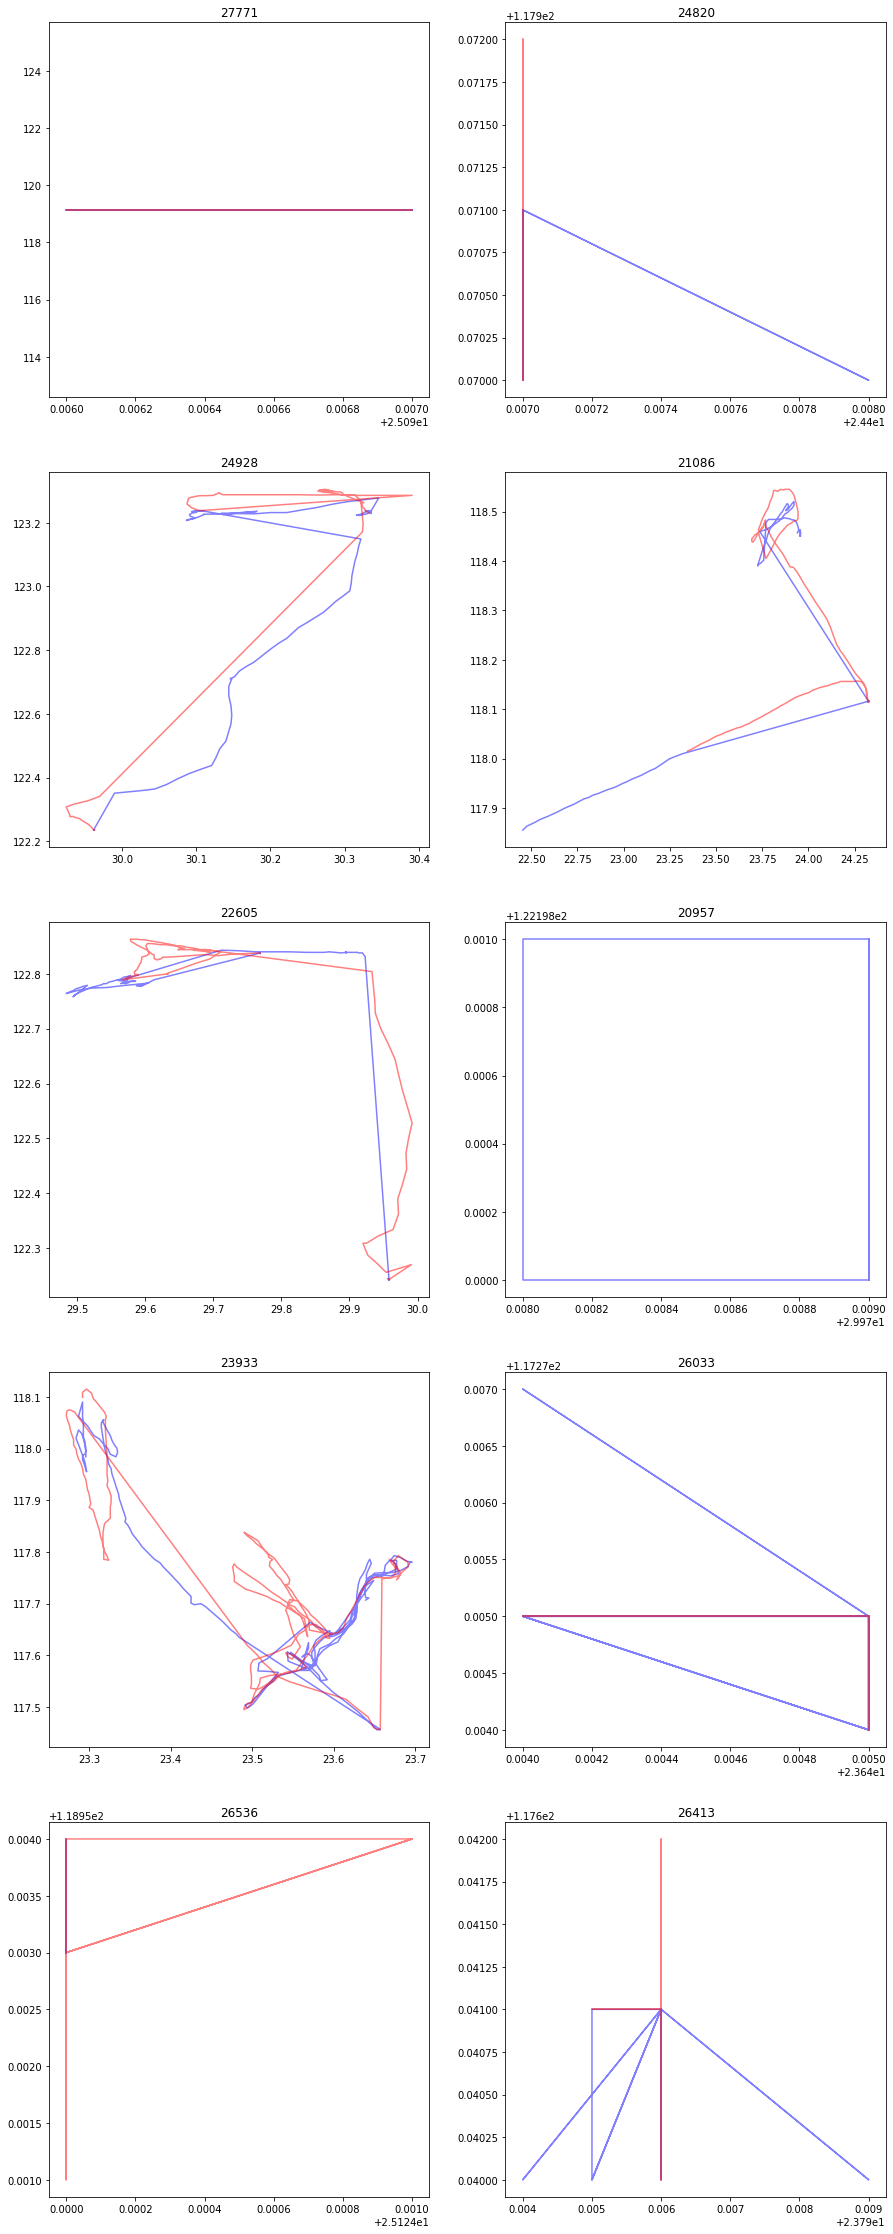

In [9]:
show_pic('xy','刺网')

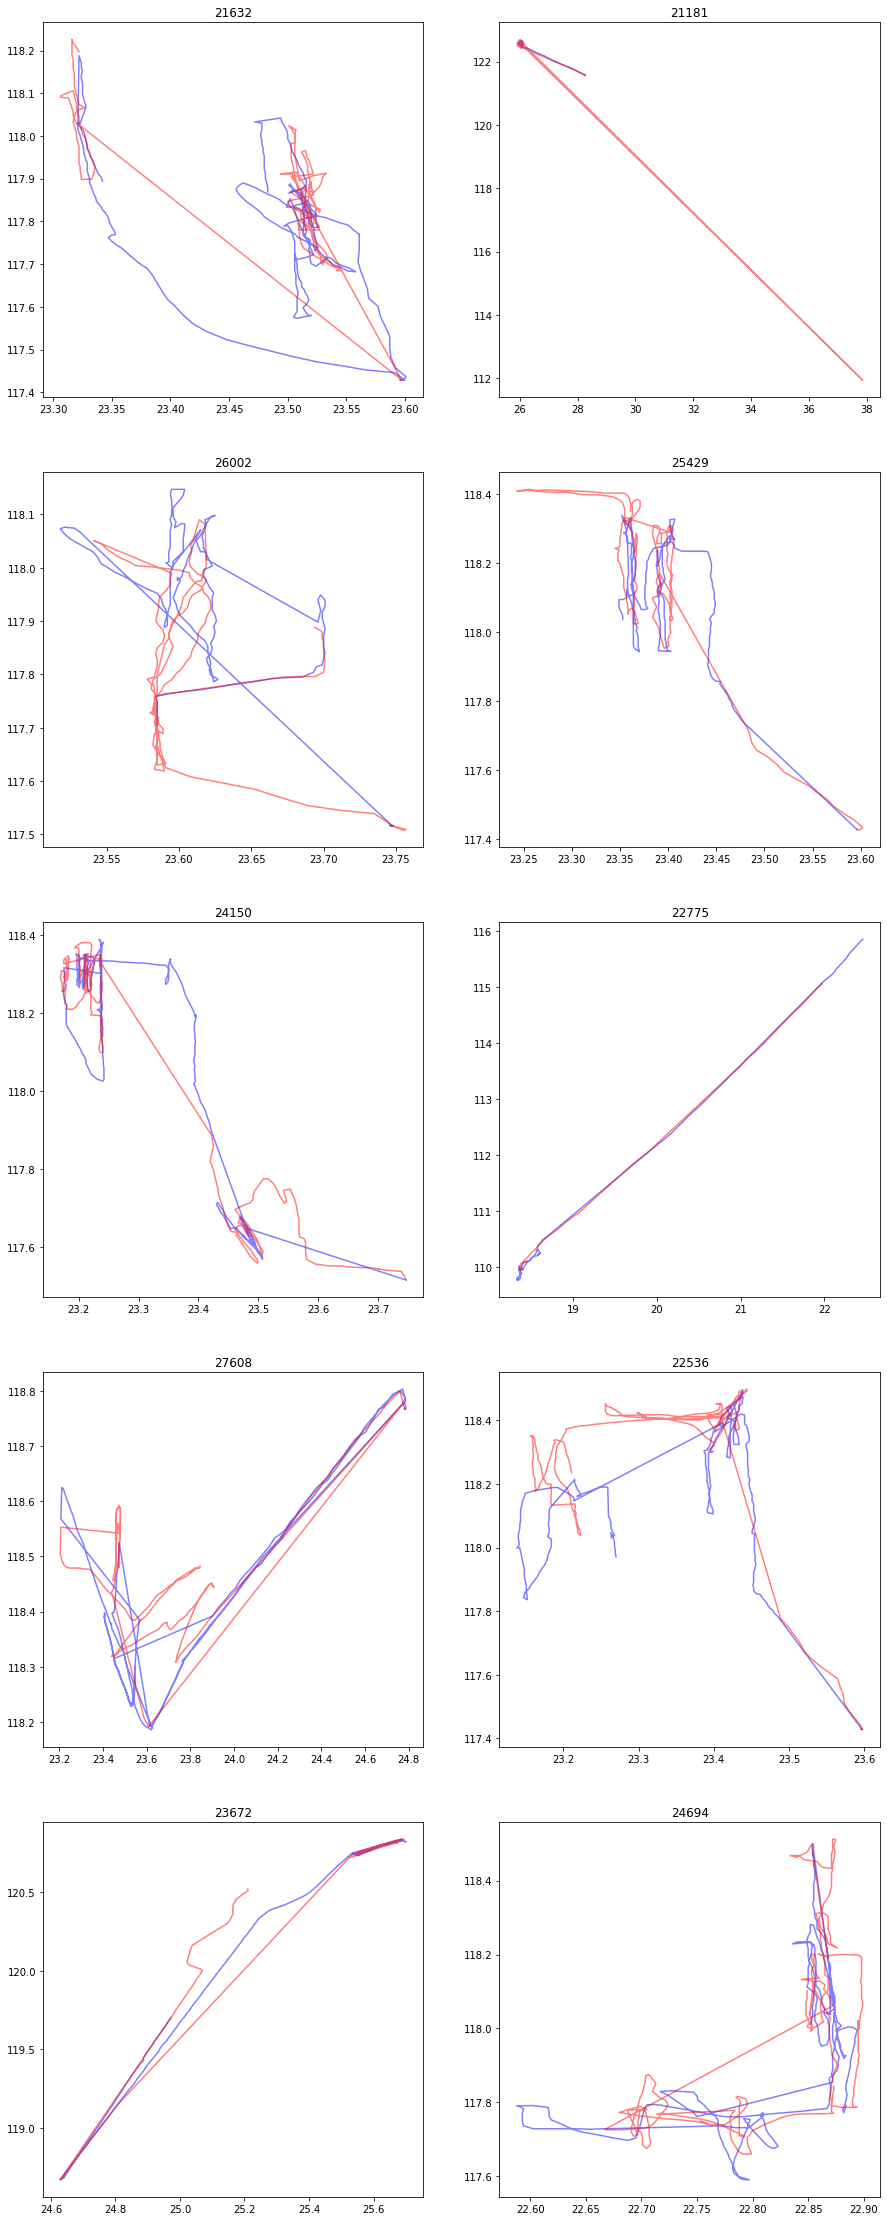

In [10]:
show_pic('xy','拖网')

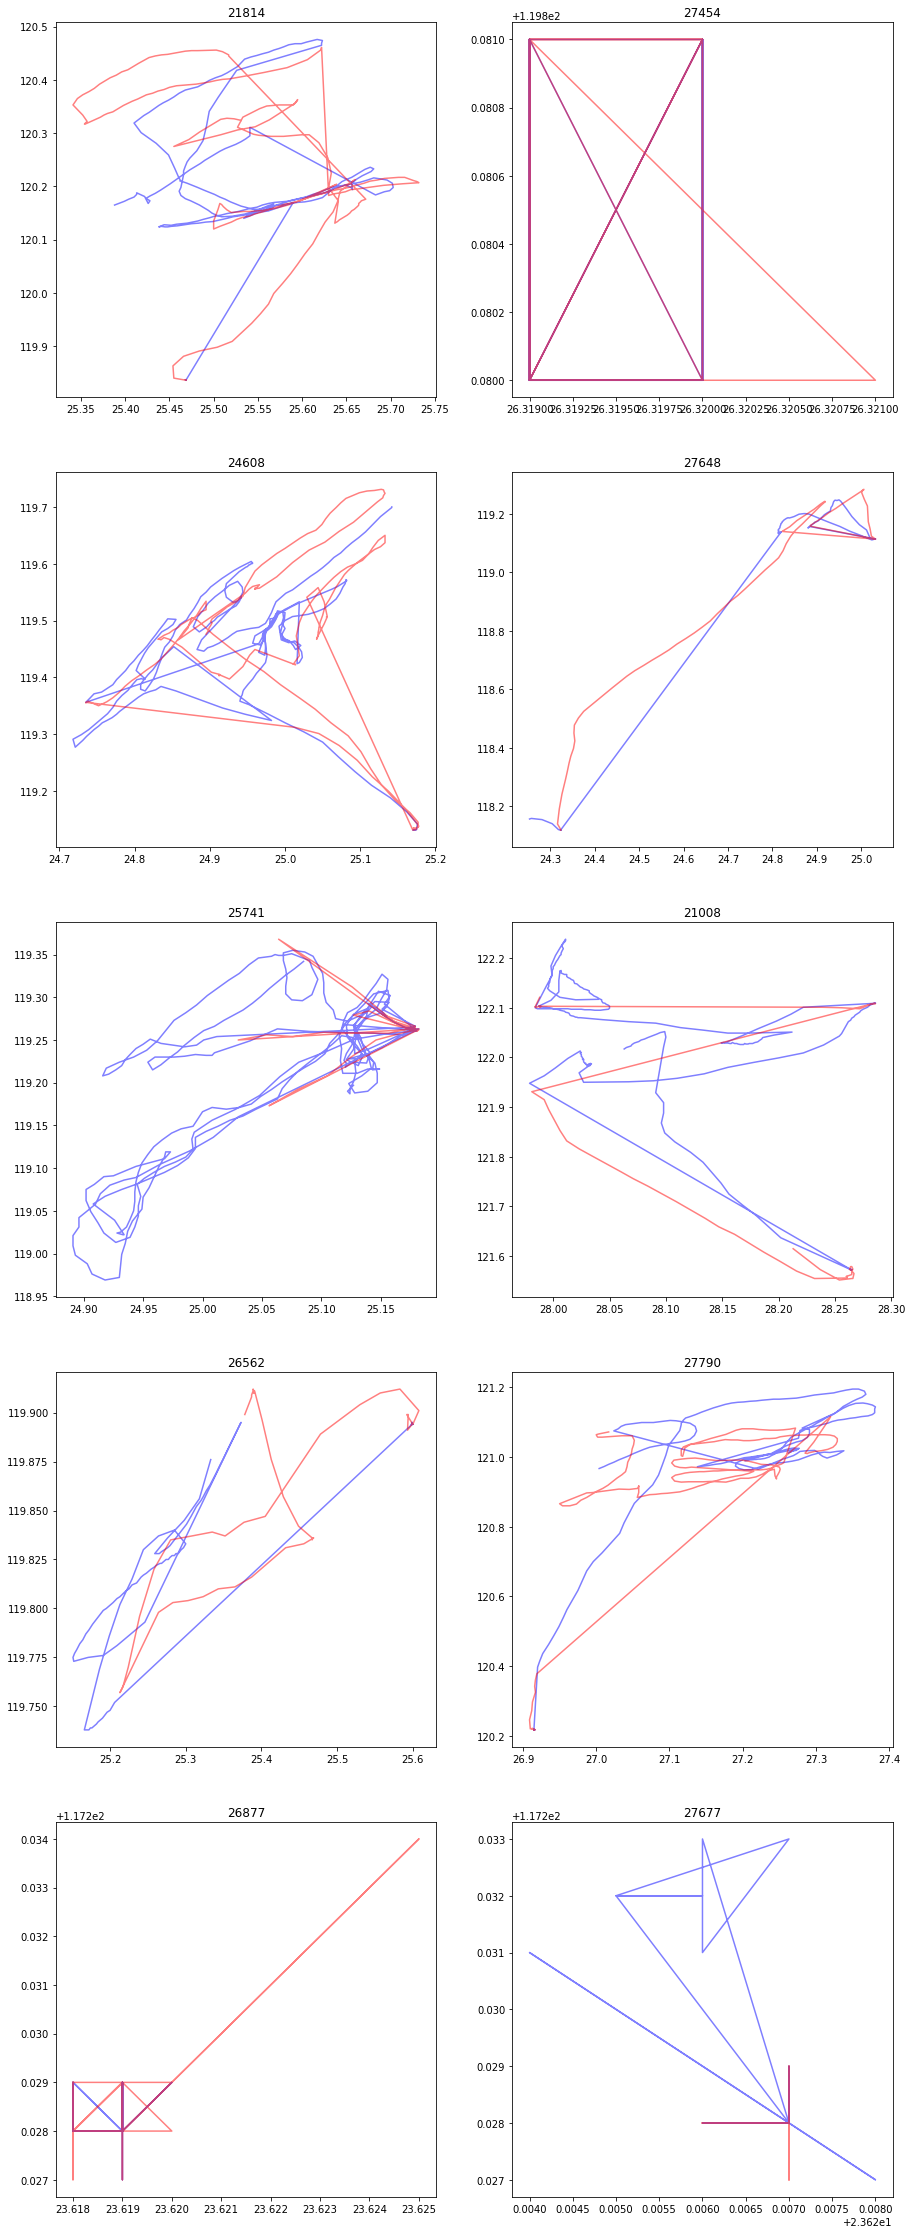

In [11]:
show_pic('xy','围网')

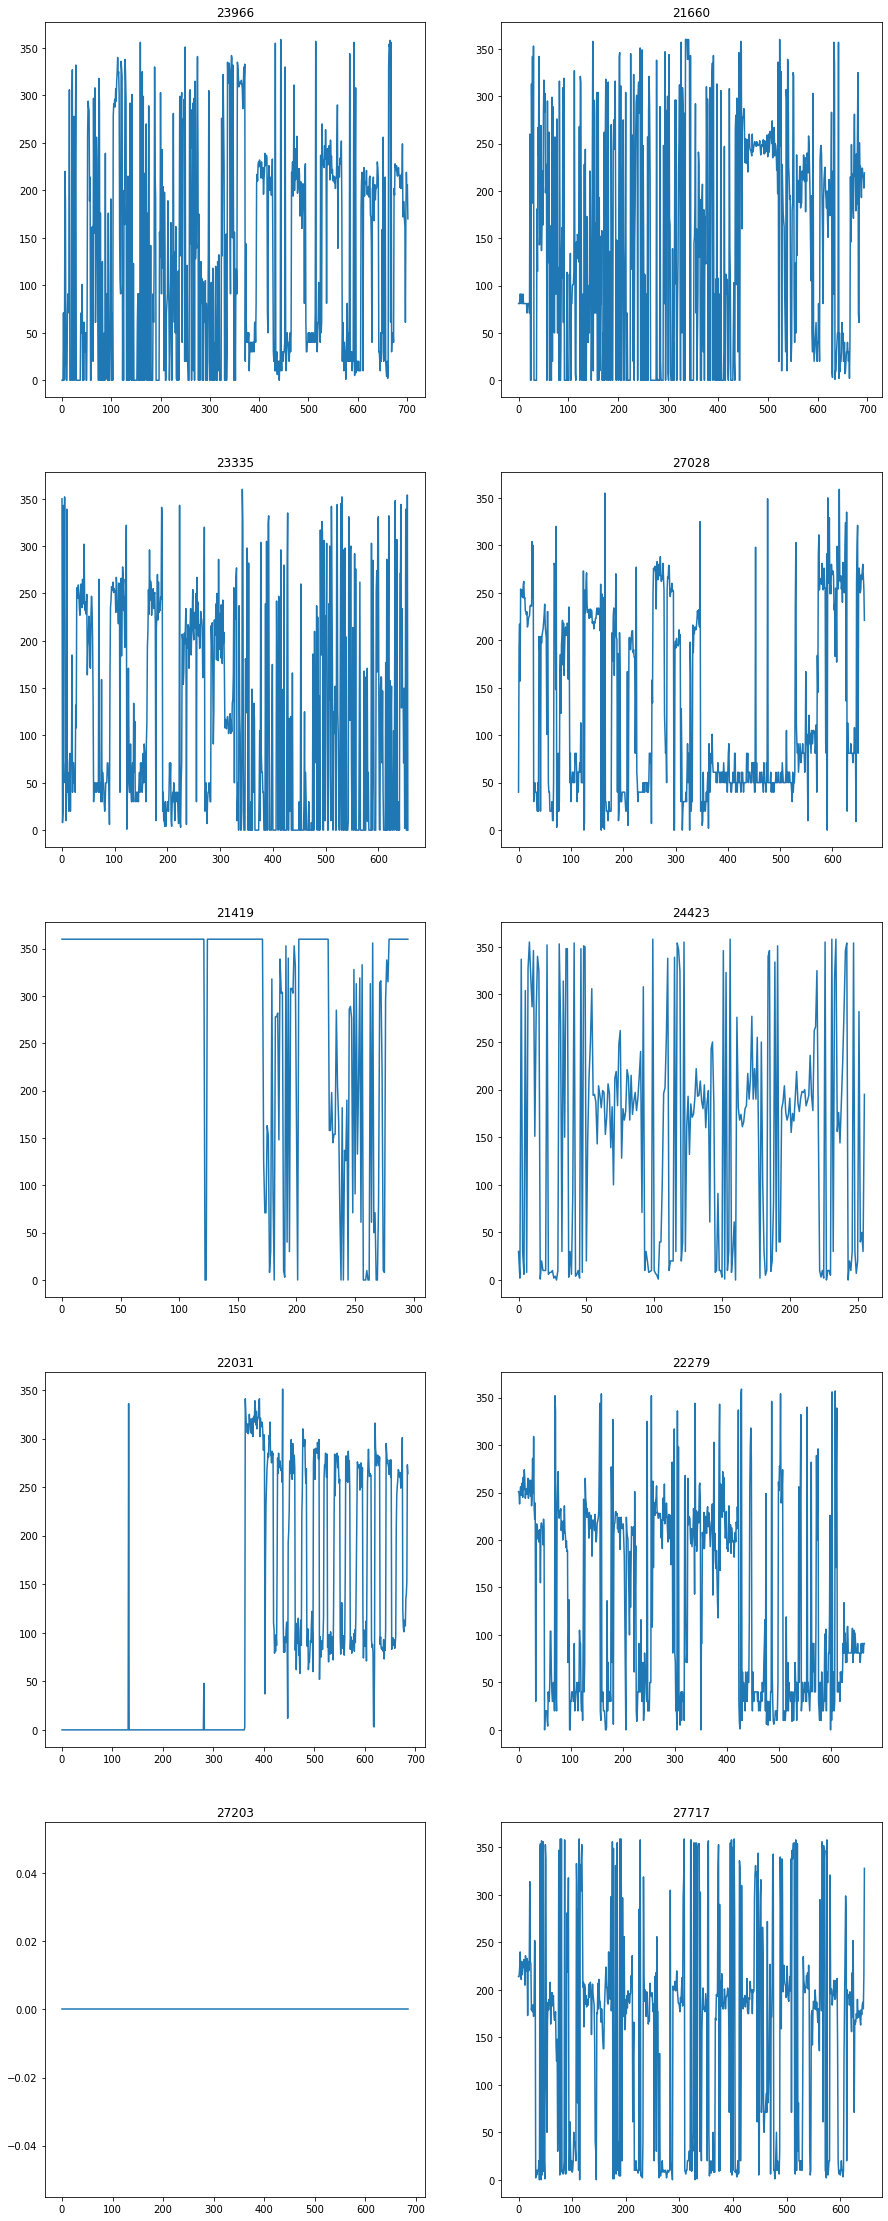

In [12]:
show_pic('d','拖网')

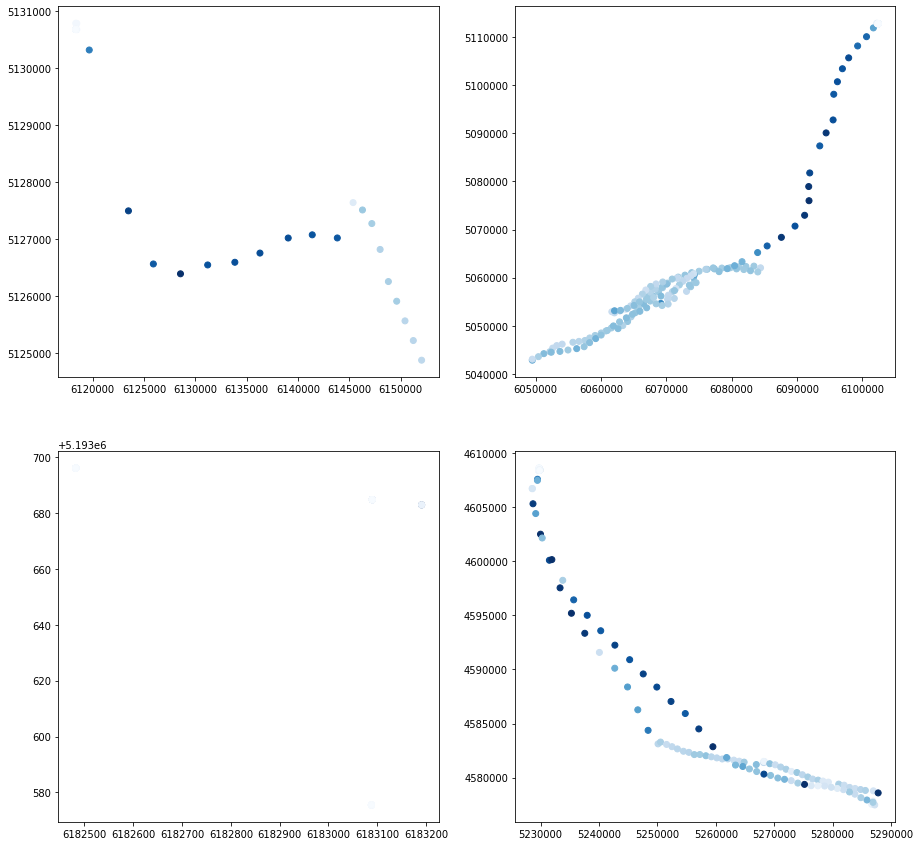

In [93]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.scatter(y0['x'],y0['y'],c=y0['速度'],cmap=plt.cm.Blues)
ax2.scatter(y1['x'],y1['y'],c=y1['速度'],cmap=plt.cm.Blues)
ax3.scatter(y2['x'],y2['y'],c=y2['速度'],cmap=plt.cm.Blues)
ax4.scatter(y3['x'],y3['y'],c=y3['速度'],cmap=plt.cm.Blues)
plt.show()

In [262]:
train0=train.groupby(['ship','x','y','v']).size().groupby('ship').idxmax().apply(pd.Series).iloc[:,1:]

In [266]:
(train0[3]==0).sum()

2542

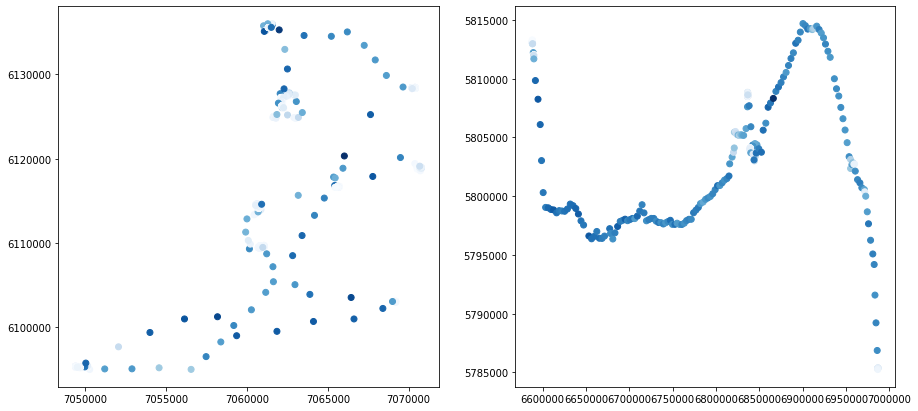

In [88]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.scatter(y4['x'],y4['y'],c=y4['速度'],cmap=plt.cm.Blues)
ax2.scatter(y7['x'],y7['y'],c=y7['速度'],cmap=plt.cm.Blues)
plt.show()

In [89]:
y.loc[y['type']=='刺网']
y13=pd.read_csv(path+'/13.csv')
y35=pd.read_csv(path+'/35.csv')

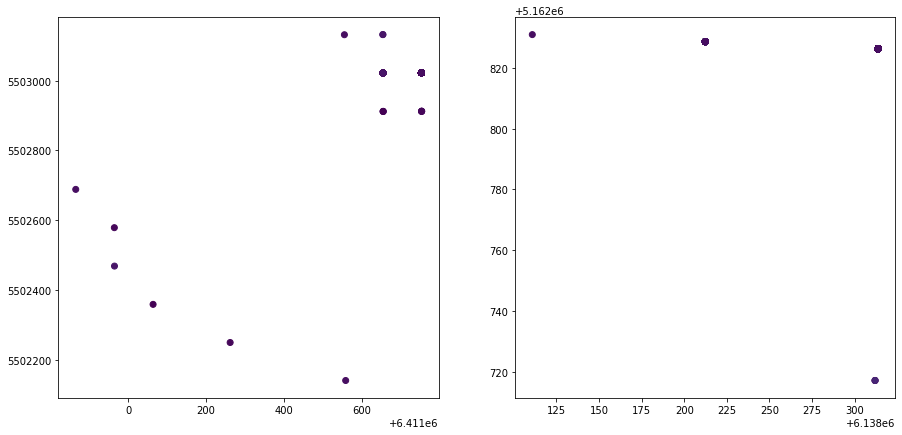

In [91]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.scatter(y13['x'],y13['y'],c=y13['速度'])
ax2.scatter(y35['x'],y35['y'],c=y35['速度'])
plt.show()

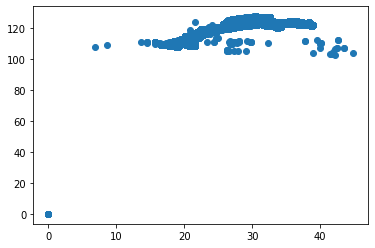

In [6]:
plt.scatter(train['x'],train['y'])